# **Background**

The transportation industry in New York City plays a crucial role in the daily mobility of millions of people. One of the most commonly used modes of transportation is taxis. The data generated by these taxi services provides valuable insights into passenger behavior, travel patterns, and the dynamics of transportation in the city.

This dataset contains detailed information about taxi trips in New York City. It covers various aspects of each trip, including the time and location of pickup and dropoff, the number of passengers, trip distance, the type of fare applied, payment methods, and the various surcharges imposed.

# **Problems Statement**

Although taxis in New York City are one of the key modes of transportation, challenges arise in deeply understanding travel patterns and passenger behavior. The issues faced include a lack of understanding of how various factors, such as time, location, payment methods, and fare types, affect the duration, distance, and cost of trips. 

A deep understanding of these aspects is crucial for optimizing taxi operations, enhancing customer experience, and assisting policymakers in formulating better strategies for managing transportation in the city.

# **Data**

Load the libraries for data analysis purposes

In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

- **VendorID**: A code indicating the LPEP provider that provided the record. 
    - 1 = Creative Mobile Technologies, LLC.
    - 2 = VeriFone Inc. 
<br><br>

- **lpep_pickup_datetime**: The date and time when the meter was engaged.
- **lpep_dropoff_datetime**: The date and time when the meter was disengaged.
- **Passenger_count**: The number of passengers in the vehicle. This is a driver-entered value.
- **Trip_distance**: The elapsed trip distance in miles was reported by the taximeter.
- **PULocationID**: TLC Taxi Zone in which the taximeter was engaged.
- **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged.
- **RateCodeID**: The final rate code is in effect at the end of the trip.
    - 1 = Standard rate
    - 2 =JFK
    - 3 =Newark
    - 4 =Nassau or Westchester
    - 5 =Negotiated fare
    - 6 =Group ride
<br><br>

- **Store_and_fwd_flag**: This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
    - Y = store and forward trip
    - N = not a store and forward trip
<br><br>

- **Payment_type**: A numeric code signifying how the passenger paid for the trip.
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip
<br><br>

- **Fare_amount**: The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
- **MTA_tax**: $0.50 MTA tax that is automatically triggered based on the metered rate in use.
- **Improvement_surcharge**: $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.
- **Tip_amount**: This field is automatically populated for credit card tips. Cash tips are not included.
- **Tolls_amount**: The total amount of all tolls paid in the trip.
- **Total_amount**: The total amount charged to passengers. Does not include cash tips.
- **Trip_type**: A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
    - 1 = Street-hail
    - 2 = Dispatch

# **Load Dataset**

In [90]:
df = pd.read_csv('/Users/raraintan/Desktop/Bootcamp/Capstone project modul 2/NYC TLC Trip Record.csv')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [91]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

# **Data Understanding and Data Cleaning**

In [93]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

## Drop Columns and Rows

In [94]:
df.drop(columns=['ehail_fee', 'extra', 'congestion_surcharge'] , inplace=True)

- Column `ehail_fee` has missing value in all the columns so it be better if we drop the column.
- Columns `extra` and `congestion_surcharge` doesn't have explanation based on the Data Dictionary

In [95]:
df.dropna(subset=['RatecodeID', 'trip_type'], inplace=True)

- Dropping `RatecodeID` and `trip_type` rows so that it doesn't have any missing value anymore. 

## Duplicate and Negative Values 

In [96]:
df.duplicated().sum()

np.int64(0)

- There is no duplicate value

- If we check the df, there is duplicated data based on `lpep_pickup_datetime` and `lpep_dropoff_datetime.`
 <br>
 Also, there is an existing duplicated data with two different value, one positive, second negative based on the `fare_amount`. 
 <br>
 It will be better if we drop negative column

In [97]:
df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID'], keep=False)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,0.5,0.0,0.0,1.0,4.5,4.0,1.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,0.5,0.0,0.0,0.3,3.8,3.0,1.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,0.5,0.0,0.0,1.0,6.2,3.0,1.0
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,0.0,0.0,0.0,-1.0,-11.0,4.0,2.0


In [98]:
negative_value = df[df['fare_amount'] <= 0]
negative_value

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0
1581,2,2023-01-02 10:29:51,2023-01-02 10:30:34,N,1.0,264,264,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0


In [99]:
df.drop(negative_value.index, inplace=True)

In [100]:
check_negative_values = df[df['fare_amount'] < 0]
check_negative_values

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type


- Successfully dropping column with negative value

## Zero Values

In [101]:
df['passenger_count'].unique()

array([1., 2., 4., 3., 6., 5., 0., 7., 9., 8.])

- There is 0 Value in the `passenger_count` which seems impossible 

In [102]:
df['passenger_count'].median()

np.float64(1.0)

In [103]:
df['passenger_count'] = df['passenger_count'].replace(0, 1)

- Replacing the 0 value with median of the `passenger_count`

In [104]:
df['passenger_count'].unique()

array([1., 2., 4., 3., 6., 5., 7., 9., 8.])

## Drop trip distance column that has value 0 

In [105]:
df['trip_distance'].unique()

array([ 2.58,  1.81,  0.  , ..., 17.78, 16.91, 16.41])

In [106]:
IndexTripJlk = df[df['trip_distance'] == 0].index
IndexTripJlk

Index([    2,    58,    99,   107,   115,   166,   169,   173,   185,   186,
       ...
       63507, 63528, 63656, 63725, 63732, 63756, 63798, 63813, 63833, 63869],
      dtype='int64', length=3064)

In [107]:
df.drop(IndexTripJlk, inplace=True)

In [108]:
df.shape

(60559, 17)

## Convert to new CSV

In [130]:
# df.to_csv('NYC TLC Trip Record New2.csv')

# **Formatting**

**lpep_pickup_datetime, pep_dropoff_datetime**

Convert argument to timedelta

In [110]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

In [111]:
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [112]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,1.5,0.00,0.0,1.0,8.00,1.0,1.0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,1.0,1.0
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,1.0,1.0
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,1.0,1.0


Create **trip duration** columns

In [113]:
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds().div(60).round(2)

In [126]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,1.0,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,1.0,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,not a store and forward trip,Standard rate,41,238,1.0,1.30,6.5,1.5,1.70,0.0,1.0,10.20,Credit card,1.0,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,not a store and forward trip,Standard rate,41,74,1.0,1.10,6.0,1.5,0.00,0.0,1.0,8.00,Credit card,1.0,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,not a store and forward trip,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,1.0,17.55


**RateCodeID**

In [114]:
df['RatecodeID'] = df['RatecodeID'].replace({1:'Standard rate', 2:'JFK Airport', 3:'Newark Airport', 4:'Nassau or Westchester', 5:'Negotiated fare', 6:'Group ride'})
df['RatecodeID'].value_counts()

RatecodeID
Standard rate            59400
Negotiated fare            955
JFK Airport                131
Nassau or Westchester       53
Newark Airport              20
Name: count, dtype: int64

**Store_and_fwd_flag**

In [115]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'Y':'store and forward trip', 'N':'not a store and forward trip'})
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
not a store and forward trip    60315
store and forward trip            244
Name: count, dtype: int64

**Payment_type**

In [116]:
df['payment_type'] = df['payment_type'].replace({1:'Credit card', 2:'Cash', 3:'No charge', 4:'Dispute', 5:'Unknown', 5:'Voided Trip'})
df['payment_type'].value_counts()

payment_type
Credit card    38434
Cash           21851
No charge        225
Dispute           49
Name: count, dtype: int64

# **Data Visualization and Analysis**

In [119]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,1.0,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,1.0,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,not a store and forward trip,Standard rate,41,238,1.0,1.30,6.5,1.5,1.70,0.0,1.0,10.20,Credit card,1.0,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,not a store and forward trip,Standard rate,41,74,1.0,1.10,6.0,1.5,0.00,0.0,1.0,8.00,Credit card,1.0,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,not a store and forward trip,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,1.0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,not a store and forward trip,Negotiated fare,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,Credit card,2.0,7.98
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,not a store and forward trip,Standard rate,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,Credit card,1.0,10.75
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,not a store and forward trip,Standard rate,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,Credit card,1.0,6.02
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,not a store and forward trip,Standard rate,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,Credit card,1.0,9.53


**Data Correlation**

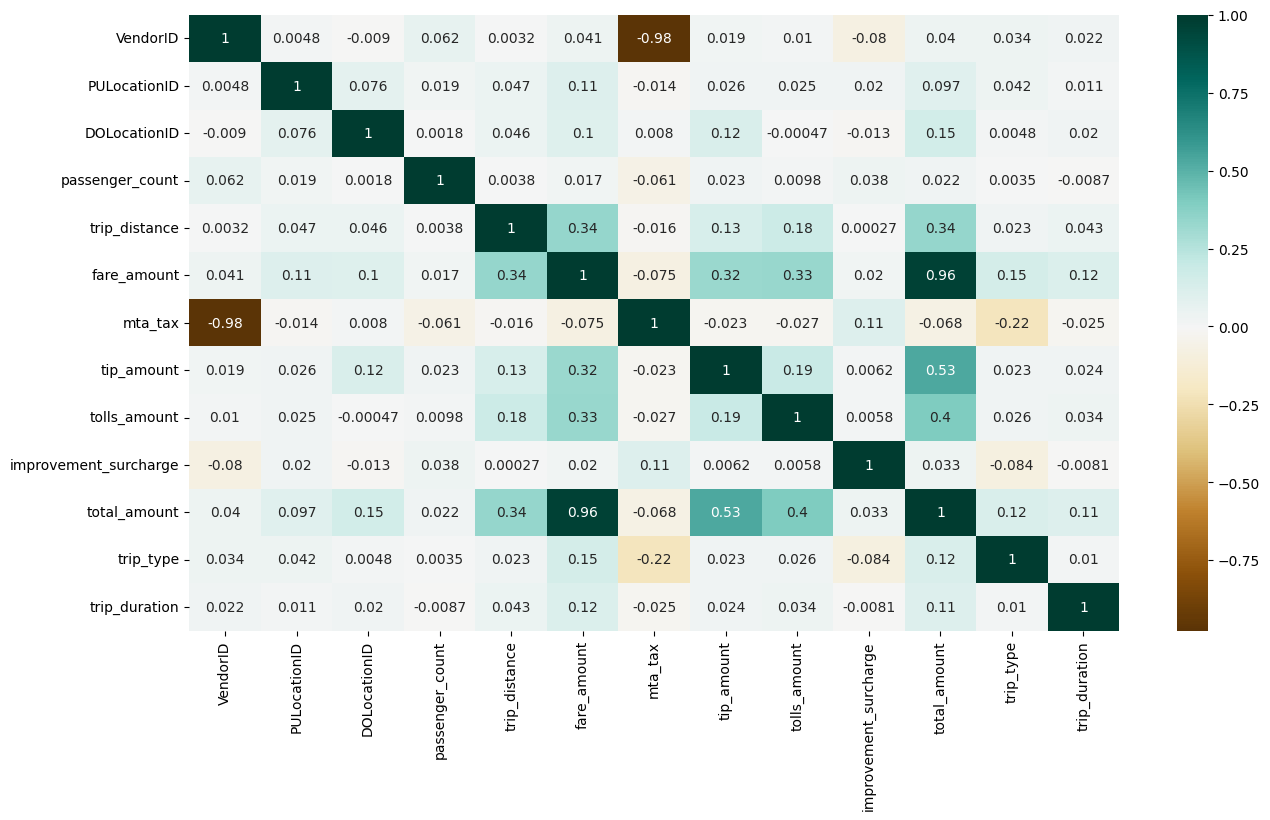

In [153]:
plt.figure(figsize=(15,8))
# visualisasi menggunakan heatmap
sns.heatmap(data = df.corr(numeric_only=True),
            annot=True,
            cmap='BrBG',
            center=0)

plt.show()

**HistPlot**

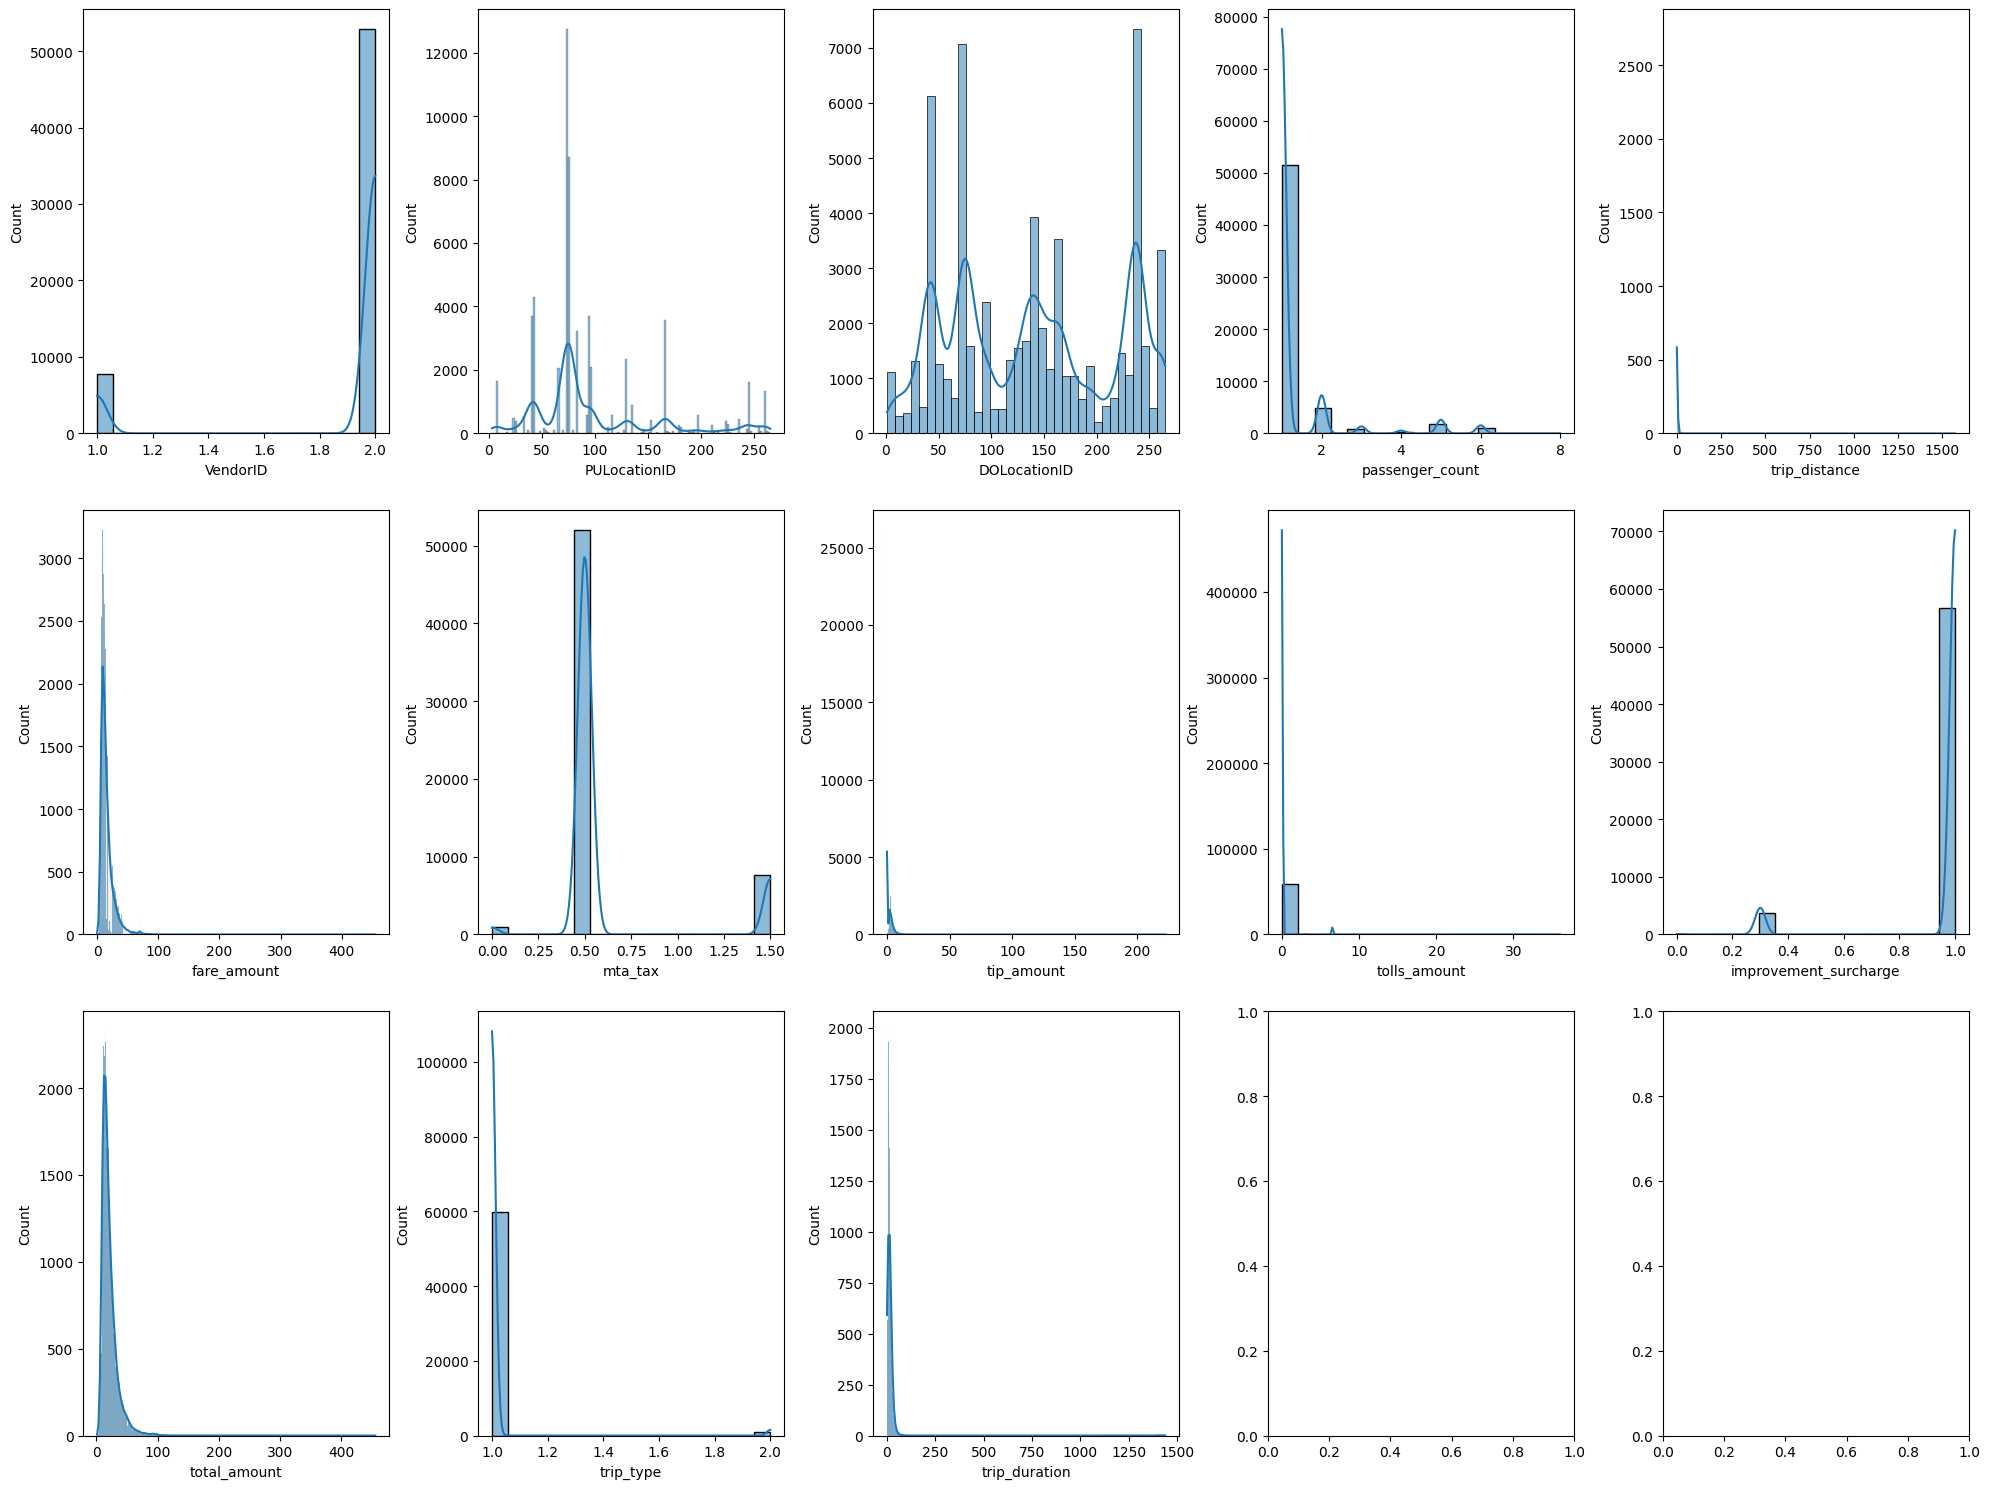

In [145]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20,15))  # Atur jumlah subplot sesuai kebutuhan
index = 0
axs = axs.flatten()

for k, v in df.select_dtypes(include=[np.number]).items():
    sns.histplot(df[k], kde=True, ax=axs[index])  # Membuat histplot dengan KDE (Kernel Density Estimation)
    index += 1

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

- seems like all of the data dont have any normal distribution

# passenger_count

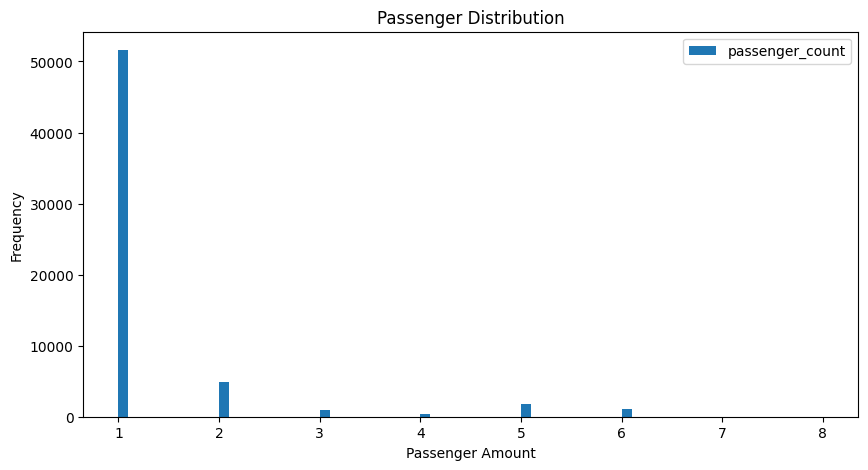

In [120]:
# Mengatur ukuran dari grafik
plt.figure(figsize=(10, 5))     # figure: (lebar, tinggi)

# Menampilkan grafik histogram
plt.hist(data = df, 
         x = 'passenger_count', 
         bins=70)

# Menampilkan judul dari grafik 
plt.title('Passenger Distribution', loc = 'center')

# Menambahkan label pada sb.x dan sb.y
plt.xlabel('Passenger Amount')
plt.ylabel('Frequency')

# Menambahakan legend
plt.legend(['passenger_count'])

# Menampilkan grafiknya saja
plt.show()

**Insight:**
- dari data yang diberikan bisa dilihat bahwa banyaknya passenger yang ada di dalam taxi tersebut hanya 1 orang dengan banyak sebesar 51604
- dari data ini saya mengasumsikan taxi ini adalah yellow taxi yang mana max passenger biasanya 4-5 passenger saja
- terdapat jumlah penumpang yang tidak wajar seperti 7 passenger dalam 2 kali trip dan 8 passenger dalam 1 kali trip

In [121]:
df['passenger_count'].value_counts()

passenger_count
1.0    51604
2.0     4903
5.0     1751
6.0     1035
3.0      904
4.0      359
7.0        2
8.0        1
Name: count, dtype: int64

In [154]:
# Counting IQR 
Q1 = df['passenger_count'].quantile(0.25)
Q3 = df['passenger_count'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers boundaries 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['passenger_count'] < lower_bound) | (df['passenger_count'] > upper_bound)]

# Amount outliers which has been found
print(f"Outliers on passenger: {len(outliers)}")

Outliers on passenger: 8955


## Trip Distance

<Axes: xlabel='trip_duration', ylabel='Count'>

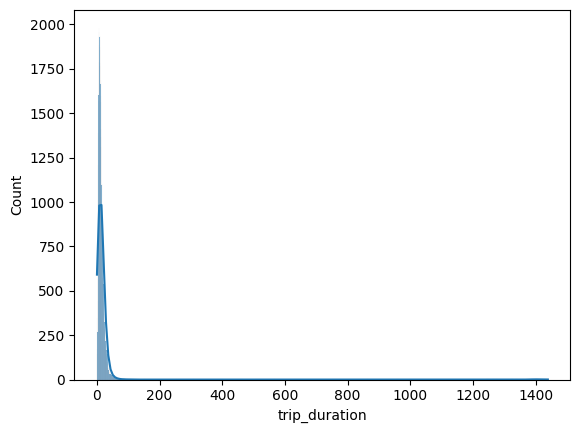

In [132]:
sns.histplot(data = df, x='trip_duration', kde=True)

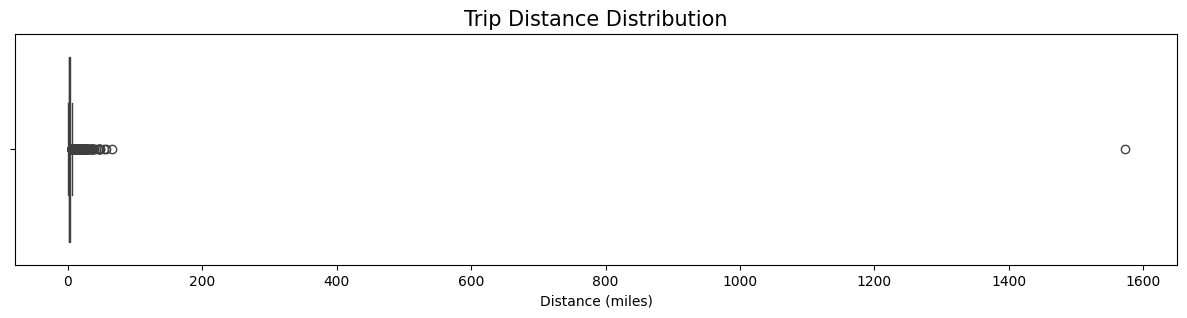

In [167]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='trip_distance')
plt.xlabel('Distance (miles)')
plt.title('Trip Distance Distribution', fontsize=15)

plt.show()

- Data tidak normal karena terdapat outliers dan ada beberapa trip yang distancenya 0.01 miles bisa diasumsikan tidak memungkinkan trip itu terjadi

In [189]:
df['trip_distance'].max()

np.float64(1571.97)

In [190]:
df['trip_distance'].min()

np.float64(0.01)

In [173]:
# Counting IQR 
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers boundaries 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)]

# Amount outliers which has been found
print(f"Outliers on trip distance: {len(outliers)}")

Outliers on trip distance: 5097


In [174]:
# Deleting Outliers
df[(df['trip_distance'] >= -250) & (df['trip_distance'] <= 250)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,1.0,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,1.0,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,not a store and forward trip,Standard rate,41,238,1.0,1.30,6.5,1.5,1.70,0.0,1.0,10.20,Credit card,1.0,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,not a store and forward trip,Standard rate,41,74,1.0,1.10,6.0,1.5,0.00,0.0,1.0,8.00,Credit card,1.0,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,not a store and forward trip,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,1.0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,not a store and forward trip,Negotiated fare,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,Credit card,2.0,7.98
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,not a store and forward trip,Standard rate,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,Credit card,1.0,10.75
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,not a store and forward trip,Standard rate,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,Credit card,1.0,6.02
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,not a store and forward trip,Standard rate,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,Credit card,1.0,9.53


In [176]:
df_new = df[df['trip_distance'].between(-250, 250)]
df_new

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,1.0,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,1.0,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,not a store and forward trip,Standard rate,41,238,1.0,1.30,6.5,1.5,1.70,0.0,1.0,10.20,Credit card,1.0,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,not a store and forward trip,Standard rate,41,74,1.0,1.10,6.0,1.5,0.00,0.0,1.0,8.00,Credit card,1.0,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,not a store and forward trip,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,1.0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,not a store and forward trip,Negotiated fare,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,Credit card,2.0,7.98
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,not a store and forward trip,Standard rate,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,Credit card,1.0,10.75
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,not a store and forward trip,Standard rate,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,Credit card,1.0,6.02
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,not a store and forward trip,Standard rate,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,Credit card,1.0,9.53


In [178]:
df_new['trip_distance'].max()

np.float64(66.18)

## Trip Duration

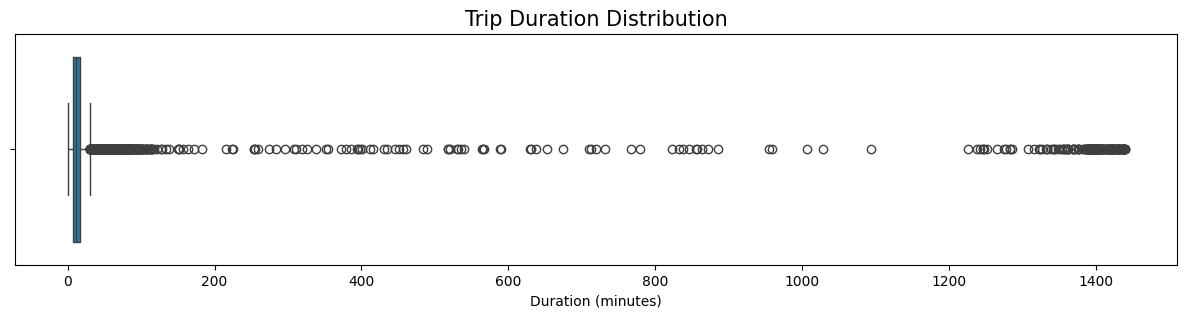

In [179]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df_new, x='trip_duration')
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distribution', fontsize=15)

plt.show()

- Data tidak normal karena ada trip duration yang melebihi 500 menit tetapi trip distance ahanya 2 - 8 miles, mungkin hal ini terjadi karena gagal record

In [195]:
df[(df['trip_duration'] > 500)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
49,2,2023-01-01 00:23:04,2023-01-01 23:18:32,not a store and forward trip,Standard rate,255,48,1.0,8.55,47.8,0.5,5.30,0.0,1.0,58.35,Credit card,1.0,1375.47
108,2,2023-01-01 01:53:59,2023-01-02 00:00:00,not a store and forward trip,Standard rate,260,223,1.0,2.64,14.9,0.5,0.00,0.0,1.0,17.40,Credit card,1.0,1326.02
118,2,2023-01-01 01:25:46,2023-01-02 00:29:15,not a store and forward trip,Standard rate,129,37,1.0,6.53,31.0,0.5,0.00,0.0,1.0,33.50,Cash,1.0,1383.48
207,2,2023-01-01 03:12:42,2023-01-02 02:03:43,not a store and forward trip,Negotiated fare,129,129,1.0,0.72,20.0,0.0,6.09,0.0,0.3,26.39,Credit card,2.0,1371.02
262,2,2023-01-01 04:03:36,2023-01-02 03:31:50,not a store and forward trip,Standard rate,65,37,5.0,3.61,20.5,0.5,0.00,0.0,1.0,23.00,Cash,1.0,1408.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62510,2,2023-01-31 12:41:35,2023-02-01 12:05:19,not a store and forward trip,Standard rate,75,42,1.0,2.17,12.8,0.5,0.00,0.0,1.0,14.30,Cash,1.0,1403.73
62591,2,2023-01-31 13:58:22,2023-02-01 11:46:10,not a store and forward trip,Standard rate,130,130,1.0,0.10,3.7,0.5,0.00,0.0,1.0,5.20,Cash,1.0,1307.80
62653,2,2023-01-31 13:57:30,2023-02-01 10:49:04,not a store and forward trip,Standard rate,244,43,3.0,5.74,31.0,0.5,0.00,0.0,0.3,34.55,Credit card,1.0,1251.57
62762,2,2023-01-31 15:21:47,2023-02-01 00:00:00,not a store and forward trip,Standard rate,92,64,2.0,9.15,39.4,0.5,4.09,0.0,1.0,44.99,Credit card,1.0,518.22


In [180]:
# Counting IQR 
Q1 = df_new['trip_duration'].quantile(0.25)
Q3 = df_new['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers boundaries 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df_new[(df_new['trip_duration'] < lower_bound) | (df_new['trip_duration'] > upper_bound)]

# Amount outliers which has been found
print(f"Outliers on trip duration: {len(outliers)}")

Outliers on trip duration: 3024


In [181]:
df['trip_duration'].value_counts()

trip_duration
7.35       98
6.17       92
10.22      92
8.87       92
6.83       91
           ..
1277.08     1
78.18       1
42.97       1
1368.48     1
61.58       1
Name: count, Length: 3429, dtype: int64

In [183]:
# Deleting Outliers
df_new[(df_new['trip_duration'] >= -250) & (df_new['trip_duration'] <= 250)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,1.0,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,1.0,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,not a store and forward trip,Standard rate,41,238,1.0,1.30,6.5,1.5,1.70,0.0,1.0,10.20,Credit card,1.0,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,not a store and forward trip,Standard rate,41,74,1.0,1.10,6.0,1.5,0.00,0.0,1.0,8.00,Credit card,1.0,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,not a store and forward trip,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,1.0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,not a store and forward trip,Negotiated fare,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,Credit card,2.0,7.98
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,not a store and forward trip,Standard rate,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,Credit card,1.0,10.75
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,not a store and forward trip,Standard rate,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,Credit card,1.0,6.02
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,not a store and forward trip,Standard rate,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,Credit card,1.0,9.53


**New Dataframe**

In [184]:
df_new_2 = df_new[df_new['trip_duration'].between(-250, 250)]
df_new_2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,not a store and forward trip,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,1.0,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,not a store and forward trip,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,1.0,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,not a store and forward trip,Standard rate,41,238,1.0,1.30,6.5,1.5,1.70,0.0,1.0,10.20,Credit card,1.0,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,not a store and forward trip,Standard rate,41,74,1.0,1.10,6.0,1.5,0.00,0.0,1.0,8.00,Credit card,1.0,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,not a store and forward trip,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,1.0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,not a store and forward trip,Negotiated fare,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,Credit card,2.0,7.98
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,not a store and forward trip,Standard rate,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,Credit card,1.0,10.75
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,not a store and forward trip,Standard rate,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,Credit card,1.0,6.02
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,not a store and forward trip,Standard rate,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,Credit card,1.0,9.53


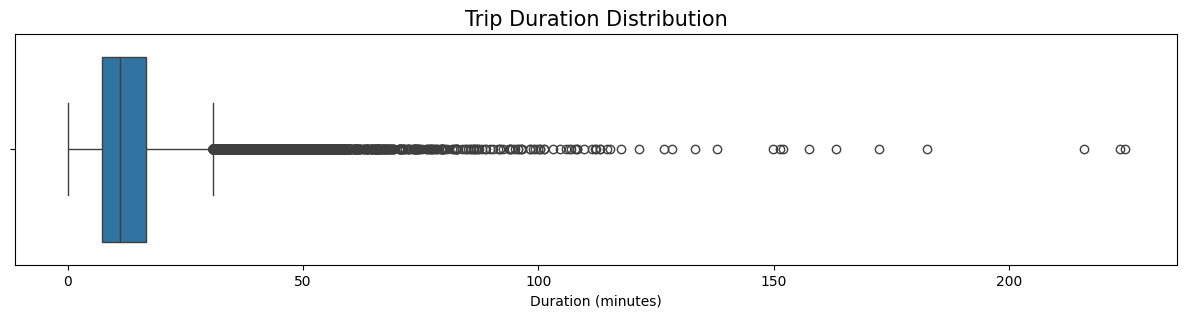

In [185]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df_new_2, x='trip_duration')
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distribution', fontsize=15)

plt.show()

## Relation between Trip Distance and Trip Duration

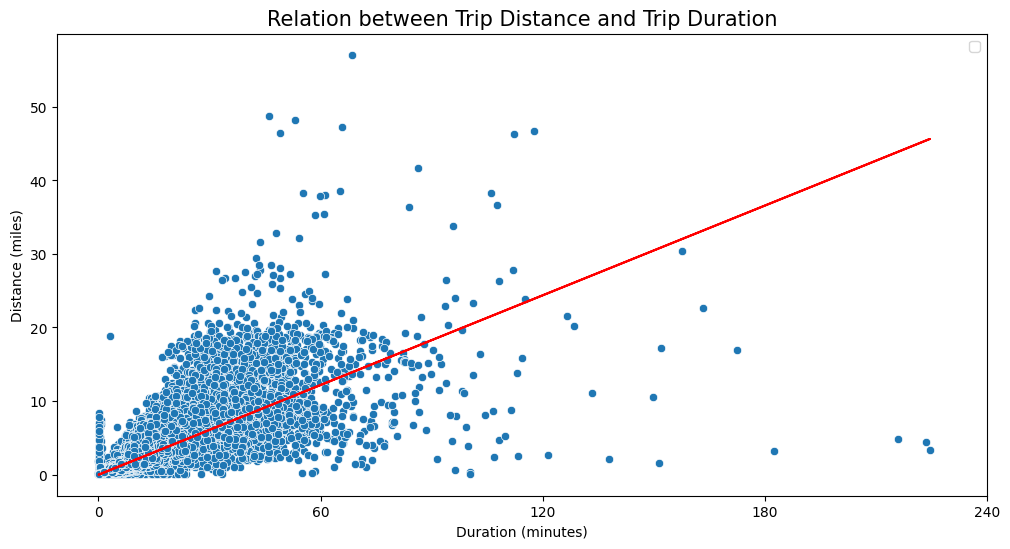

In [186]:
plt.figure(figsize=(12,6))

sns.scatterplot(df_new_2, x='trip_duration', y='trip_distance')

x, y = df_new_2['trip_duration'], df_new_2['trip_distance'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 241, 60))
plt.legend(loc ="upper right", prop={'size': 10})
plt.title('Relation between Trip Distance and Trip Duration', fontsize=15)
plt.show()

- Semakin lama trip duration maka jarak semakin jauh

## Tip based on Trip Distance

Text(0.5, 1.0, 'Relation between Tip and Distance')

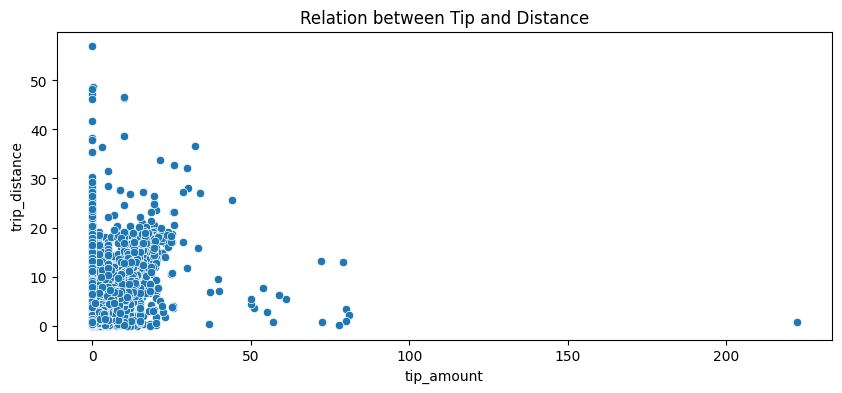

In [188]:
# melihat relationship antara data
plt.figure(figsize=(10,4))

sns.scatterplot(data= df_new_2,
                    x='tip_amount',
                    y='trip_distance'
                
                )

plt.title('Relation between Tip and Distance')

- jarak tidak mempengaruhi besarnya tip yang diberikan passenger

## Relation between RateCodeID and Fare_amount

**Fare_amount**

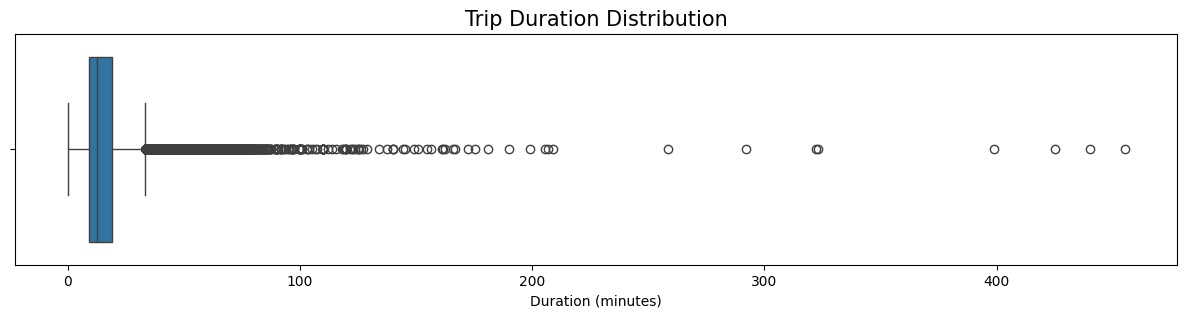

In [196]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df_new_2, x='fare_amount')
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distribution', fontsize=15)

plt.show()

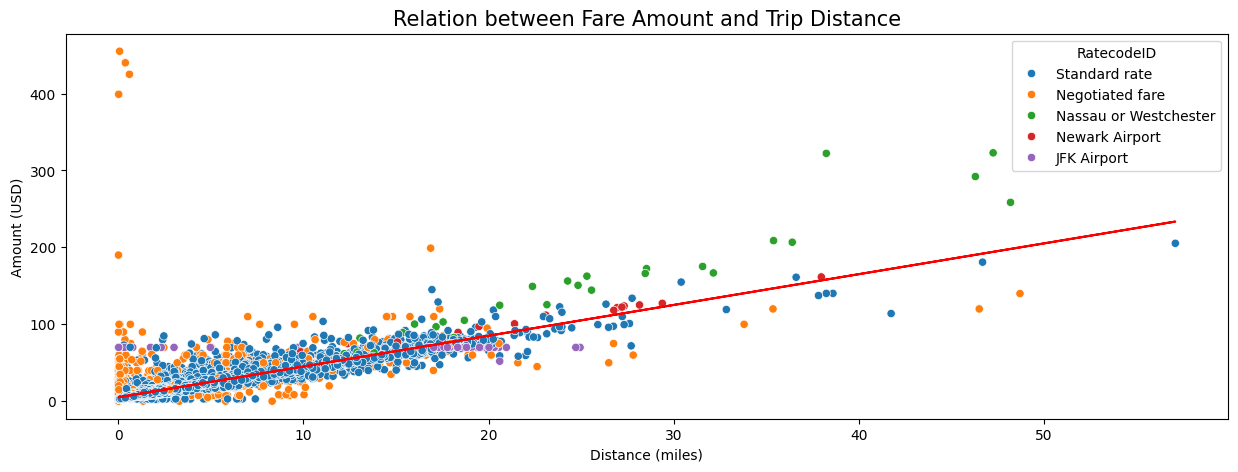

In [197]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df_new_2, x='trip_distance', y='fare_amount',  hue='RatecodeID')
plt.xlabel('Distance (miles)')
plt.ylabel('Amount (USD)')
plt.title('Relation between Fare Amount and Trip Distance', fontsize=15)

x, y = df_new_2['trip_distance'], df_new_2['fare_amount'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()

- Dari visual diatas trend line menunjukan bahwa semakin jauh jarakn akan semakin besar fare amount, 
- Banyak data point dari standard rate yang dimana jarak hanya 0- 20 miles,
- Ada outliers particularly for JFK, and Newark airport, ini mendisikasikan bahwa ada fixed or premium rates untuk arah ke bandara,
- Data point green ( nassau/westchester) menunjukan jarak yang jauh dan yang membutuhkan waktu lama membuat fare amount lebih besar.

In [198]:
df_new_2.to_csv('NYC TLC Trip Record Clean.csv')